In [1]:
from dataset.msc_sessions import MSC_Session
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [2]:
configs_options = {
    "speaker_prefixes": [None, ["<other>", "<self>"]],
}
basedir = "/Users/FrankVerhoef/Programming/PEX/data/msc/msc_dialogue/"
subsets = {
    1: ['train', 'valid', 'test'],
    2: ['train', 'valid', 'test'],
    3: ['train', 'valid', 'test'],
    4: ['train', 'valid', 'test'],
    5: ['valid', 'test']
}

In [3]:
configs = {
    "default": {
        "speaker_prefixes": ["<other>", "<self>"],
        "sessionbreak_token": "<sessionbreak>"
    }
}

variants = {
    "no_persona_no_hist": {"include_persona": False, "include_history": False},
    "persona_no_hist": {"include_persona": True, "include_history": False},
    "persona_and_hist": {"include_persona": True, "include_history": True},
}

In [4]:
MSC_Session.set(**configs['default'])

In [5]:
msc_sessions = {}
for session in subsets.keys():
    if session == 1:
        version = ['both', 'revised']
        session = '-'.join(['1'] + version)
    msc_sessions[int(str(session)[0])] = {}
    for option_name in variants.keys():
        msc_sessions[int(str(session)[0])][option_name] = {
            subset: MSC_Session(basedir=basedir, session=session, subset=subset, **variants[option_name]) 
            for subset in subsets[int(str(session)[0])]
        }



2023-05-22 21:23:46,634 INFO     | Init ConvAI2 with basedir=/Users/FrankVerhoef/Programming/PEX/data/msc/msc_dialogue/ConvAI2/, version=['both', 'revised'], subset=train
2023-05-22 21:23:46,635 INFO     | For ConvAI2 dataset, use 90% of train dataset for training (rest is available as validation dataset)
2023-05-22 21:23:47,306 INFO     | Read 16090 dialogues from ConvAI2 for train dataset
2023-05-22 21:23:47,375 INFO     | Init ConvAI2 with basedir=/Users/FrankVerhoef/Programming/PEX/data/msc/msc_dialogue/ConvAI2/, version=['both', 'revised'], subset=valid
2023-05-22 21:23:47,375 INFO     | For ConvAI2 dataset, use 10% of train dataset as validation dataset
2023-05-22 21:23:48,093 INFO     | Read 1788 dialogues from ConvAI2 for valid dataset
2023-05-22 21:23:48,101 INFO     | Init ConvAI2 with basedir=/Users/FrankVerhoef/Programming/PEX/data/msc/msc_dialogue/ConvAI2/, version=['both', 'revised'], subset=test
2023-05-22 21:23:48,102 INFO     | For ConvAI2 dataset, use validation datas

In [6]:
m = {
    session: {
        option_name: {subset: msc_sessions[session][option_name][subset].measurements() for subset in subsets[session]}
        for option_name in variants.keys()
    }
    for session in subsets.keys()
}

## Show a few examples

In [7]:
for i in range(10):
    print(msc_sessions[1]['no_persona_no_hist']['train'][i])

("<sessionbreak>dialogue start\n<other>hi , how are you doing ? i'm getting ready to do some cheetah chasing to stay in shape .\n<self>you must be very fast . hunting is one of my favorite hobbies .\n<other>i am ! for my hobby i like to do canning or some whittling .\n<self>i also remodel homes when i am not out bow hunting .\n<other>that's neat . when i was in high school i placed 6th in 100m dash !\n<self>that's awesome . do you have a favorite season or time of year ?\n<other>i do not . but i do have a favorite meat since that is all i eat exclusively .\n<self>what is your favorite meat to eat ?\n<other>i would have to say its prime rib . do you have any favorite foods ?\n<self>i like chicken or macaroni and cheese .\n<other>do you have anything planned for today ? i think i am going to do some canning .\n<self>i am going to watch football . what are you canning ?\n<other>i think i will can some jam . do you also play footfall for fun ?", 'if i have time outside of hunting and remod

In [8]:
for i in range(10):
    print(msc_sessions[4]['persona_and_hist']['valid'][i])

("<self>I read twenty books a year.\n<self>I'm a stunt double as my second job.\n<self>I only eat kosher.\n<self>I was raised in a single parent household.\n<other>I like cooler weather.\n<other>My son is in junior high.\n<other>I used to work in human services. My wife goes to work. I stay at home.\n<other>My dad worked at Home Depot.\n<other>i want to see the new Stephen King adaptation. Shawshank Redemption was filmed where I live. I know people who were doubles in it. I love horror. True crime is my favorite reading subject. I would love The Butterfly Garden. I just read a serial killer book.\n<other>I use kindle and Amazon Prime. I read Fatal Charm and want to read something similar.\n<other>I love apps that sync with my library number.\n<other>My life is boring.\n<other>I read books to the kids group at the library.\n<sessionbreak>dialogue start\n<other>Hello what are doing today?\n<self>I am good, I just got off work and tired, I have two jobs.\n<other>I just got done watching a

## Measurements overview with Pandas Dataframe

In [10]:
# Collect all item measurements in a dataframe

df_colums = list(m[1]["no_persona_no_hist"]['train']["allitem_measurements"][0].keys())
df = pd.DataFrame(columns=df_colums).astype('int16')

for session in subsets.keys():
    for variant in variants.keys():
        for subset in subsets[session]:
            subset_df = pd.DataFrame.from_dict(m[session][variant][subset]["allitem_measurements"]).astype('int16')

            subset_df["session"] = int(session)
            subset_df["variant"] = variant
            subset_df["subset"] = subset
        
            df = pd.concat([df, subset_df])

df["session"] = df["session"].astype('int')
df.describe()


,dialog_id,len_window,inputwords,inputsentences,labelwords,session
count,95649.000000,95649.000000,95649.000000,95649.000000,95649.000000,95649.000000
mean,4674.264749,12.531663,290.200776,21.593211,16.295142,1.784525
std,4808.969258,2.053866,237.420093,12.245347,10.986976,1.111878
min,0.000000,5.000000,41.000000,6.000000,1.000000,1.000000
25%,661.000000,11.000000,165.000000,16.000000,9.000000,1.000000
50%,2716.000000,13.000000,202.000000,19.000000,13.000000,1.000000
75%,8119.000000,15.000000,315.000000,21.000000,19.000000,3.000000
max,16089.000000,49.000000,2341.000000,88.000000,140.000000,5.000000


In [11]:
# Overview of statistics, by session and subset

df.groupby(["session", "variant", "subset"]).agg({'len_window': ['count'], 'inputwords': ['mean', 'std'], 'inputsentences': ['mean', 'std'], 'labelwords': ['mean', 'std'], })

len_window   inputwords              \
                                       count         mean         std   
session variant            subset                                       
1       no_persona_no_hist test         1000   173.765000   27.982151   
                           train       16090   155.171473   32.463940   
                           valid        1788   149.434004   32.849006   
        persona_and_hist   test         1000   203.403000   28.719844   
                           train       16090   182.846737   33.069018   
                           valid        1788   177.272371   33.650649   
        persona_no_hist    test         1000   203.403000   28.719844   
                           train       16090   182.846737   33.069018   
                           valid        1788   177.272371   33.650649   
2       no_persona_no_hist test          501   254.319361   68.767622   
                           train        4000   252.671250   83.723041   
                           valid         500   257.926000   84.853384   
        persona_and_hist   test          501   462.972056   76.543420   
                           train        4000   467.203750   89.001674   
                           valid         500   494.744000   89.399771   
        persona_no_hist    test          501   316.670659   71.739343   
                           train        4000   307.722500   84.893617   
                           valid         500   323.342000   85.833886   
3       no_persona_no_hist test          501   270.185629   70.677008   
                           train        4000   270.537250   81.489433   
                           valid         500   259.594000   78.647416   
        persona_and_hist   test          501   784.291417  117.878289   
                           train        4000   782.256500  127.282917   
                           valid         500   804.196000  134.196494   
        persona_no_hist    test          501   360.786427   75.250916   
                           train        4000   346.111000   83.592306   
                           valid         500   350.654000   83.488916   
4       no_persona_no_hist test          501   285.666667   78.833436   
                           train        1001   266.993007   73.802039   
                           valid         500   265.770000   70.678937   
        persona_and_hist   test          501  1123.882236  151.417740   
                           train        1001  1113.400599  152.043817   
                           valid         500  1116.730000  163.092414   
        persona_no_hist    test          501   405.866267   86.203713   
                           train        1001   371.565435   78.409030   
                           valid         500   379.620000   77.364916   
5       no_persona_no_hist test          501   300.127745   89.279402   
                           valid         500   267.076000   64.127989   
        persona_and_hist   test          501  1481.313373  187.374672   
                           valid         500  1434.054000  179.880575   
        persona_no_hist    test          501   451.327345   96.446133   
                           valid         500   406.474000   74.184986   

                                  inputsentences           labelwords  \
                                            mean       std       mean   
session variant            subset                                       
1       no_persona_no_hist test        15.602000  1.038593  10.959000   
                           train       14.708515  1.742924  10.866314   
                           valid       14.662192  1.709771  10.885347   
        persona_and_hist   test        20.097000  1.179399  10.959000   
                           train       19.204786  1.810773  10.866314   
                           valid       19.159955  1.784133  10.885347   
        persona_no_hist    test        20.097000  1.179399  10.959000   
                  

/Users/FrankVerhoef/opt/miniconda3/envs/pex/lib/python3.9/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


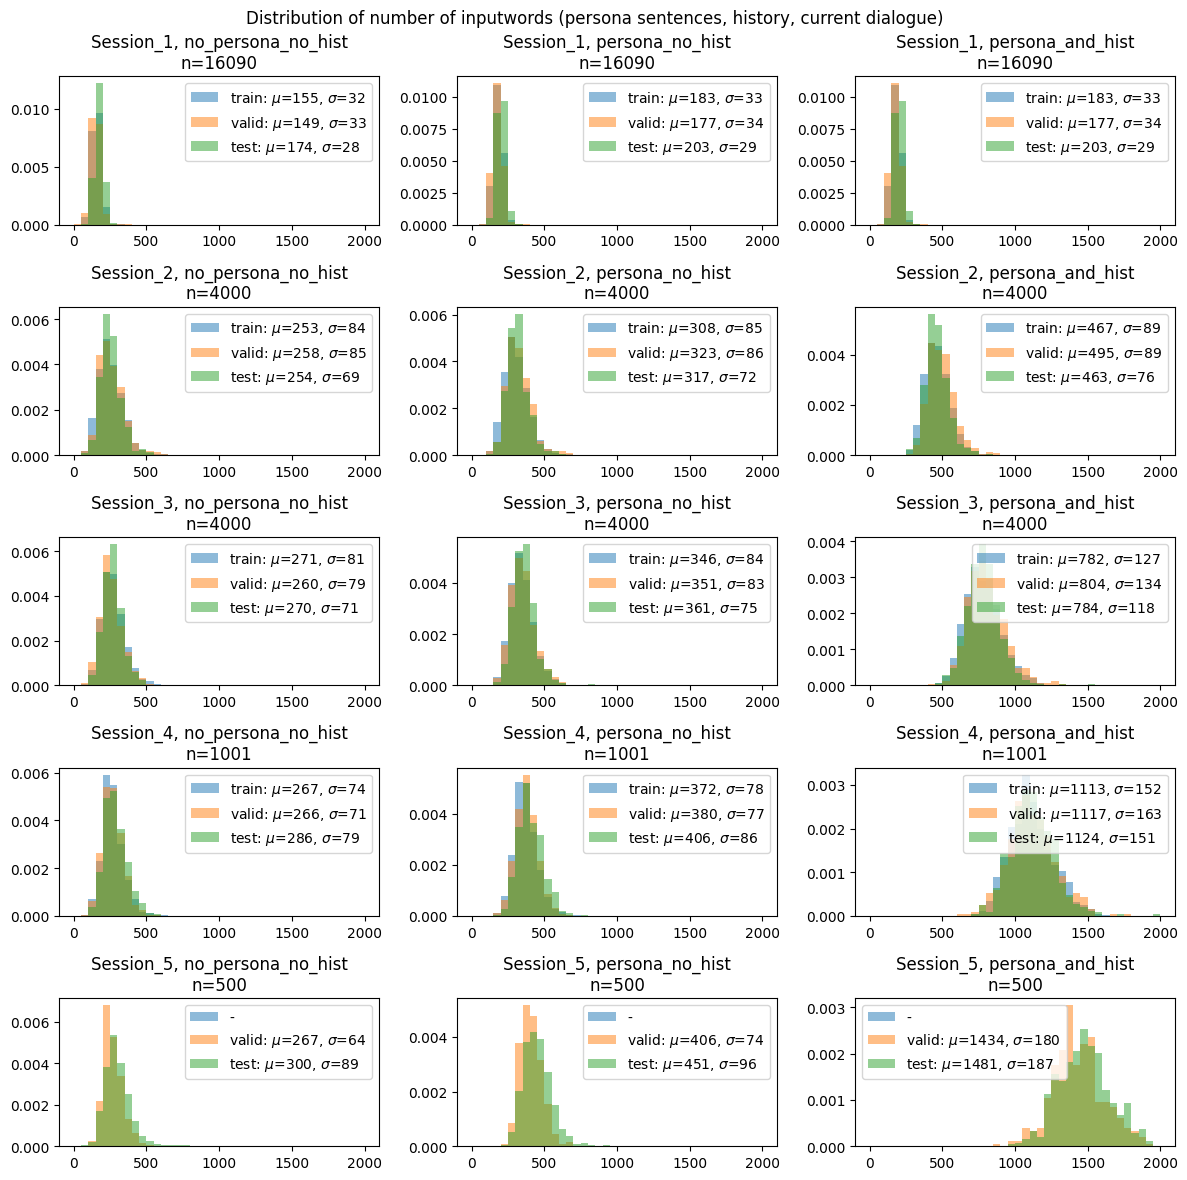

In [12]:
fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(12, 12))

def plot_hist_bar(ax, values, session, title, bins, range):

    if session==5:
        label = '-' # add empty label
        vals = [-1]  # plot a bar, outside the range
        ax.hist(vals, bins=bins, range=range, alpha=0.5, label=label, density=True)
    for subset, vals in zip(subsets[session], values): 
        label = f"{subset}: " + r"$\mu$" + f"={vals.mean():.0f}, " + r"$\sigma$" + f"={vals.std():.0f}"
        ax.hist(vals, bins=bins, range=range, alpha=0.5, label=label, density=True)
    ax.legend()
    ax.set_title(title)
    return ax

for j, variant in enumerate(variants.keys()):
    for i, session in enumerate(subsets.keys()):
        m_input = []
        for subset in subsets[session]:
            selection = selection = (df["session"] == session) & (df["variant"] == variant) & (df["subset"] == subset)
            m_input.append(df[selection]['inputwords'].values)
        bar_axes = plot_hist_bar(ax[i][j], m_input, session, title=f"Session_{session}, {variant}\nn={len(m_input[0])}", bins=40, range=(0,2000))

fig.suptitle(f"Distribution of number of inputwords (persona sentences, history, current dialogue)")
fig.tight_layout()

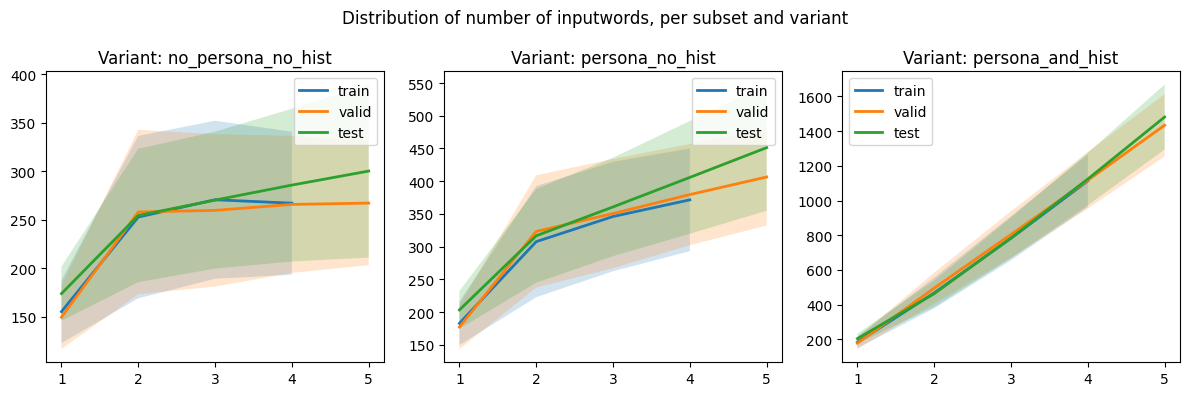

In [13]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 4), sharey=False, sharex=True)

def plot_mean_with_std(ax, values, subset):
    sessions = [s for s in subsets.keys() if subset in subsets[s]]
    means = np.array([vals.mean() for vals in values])
    stds = np.array([vals.std() for vals in values])
    ax.plot(sessions, means, lw=2, label=subset)
    ax.fill_between(sessions, means+stds, means-stds, alpha=0.2)
    return ax

for j, variant in enumerate(variants.keys()):
    for i, subset in enumerate(['train', 'valid', 'test']):
        m_input = []
        sessions = [s for s in subsets.keys() if subset in subsets[s]]
        for session in sessions:
            selection = selection = (df["session"] == session) & (df["variant"] == variant) & (df["subset"] == subset)
            m_input.append(df[selection]['inputwords'].values)
        bar_axes = plot_mean_with_std(ax[j], m_input, subset)
    ax[j].legend()
    ax[j].set_title(f"Variant: {variant}")

fig.suptitle(f"Distribution of number of inputwords, per subset and variant")
fig.tight_layout()

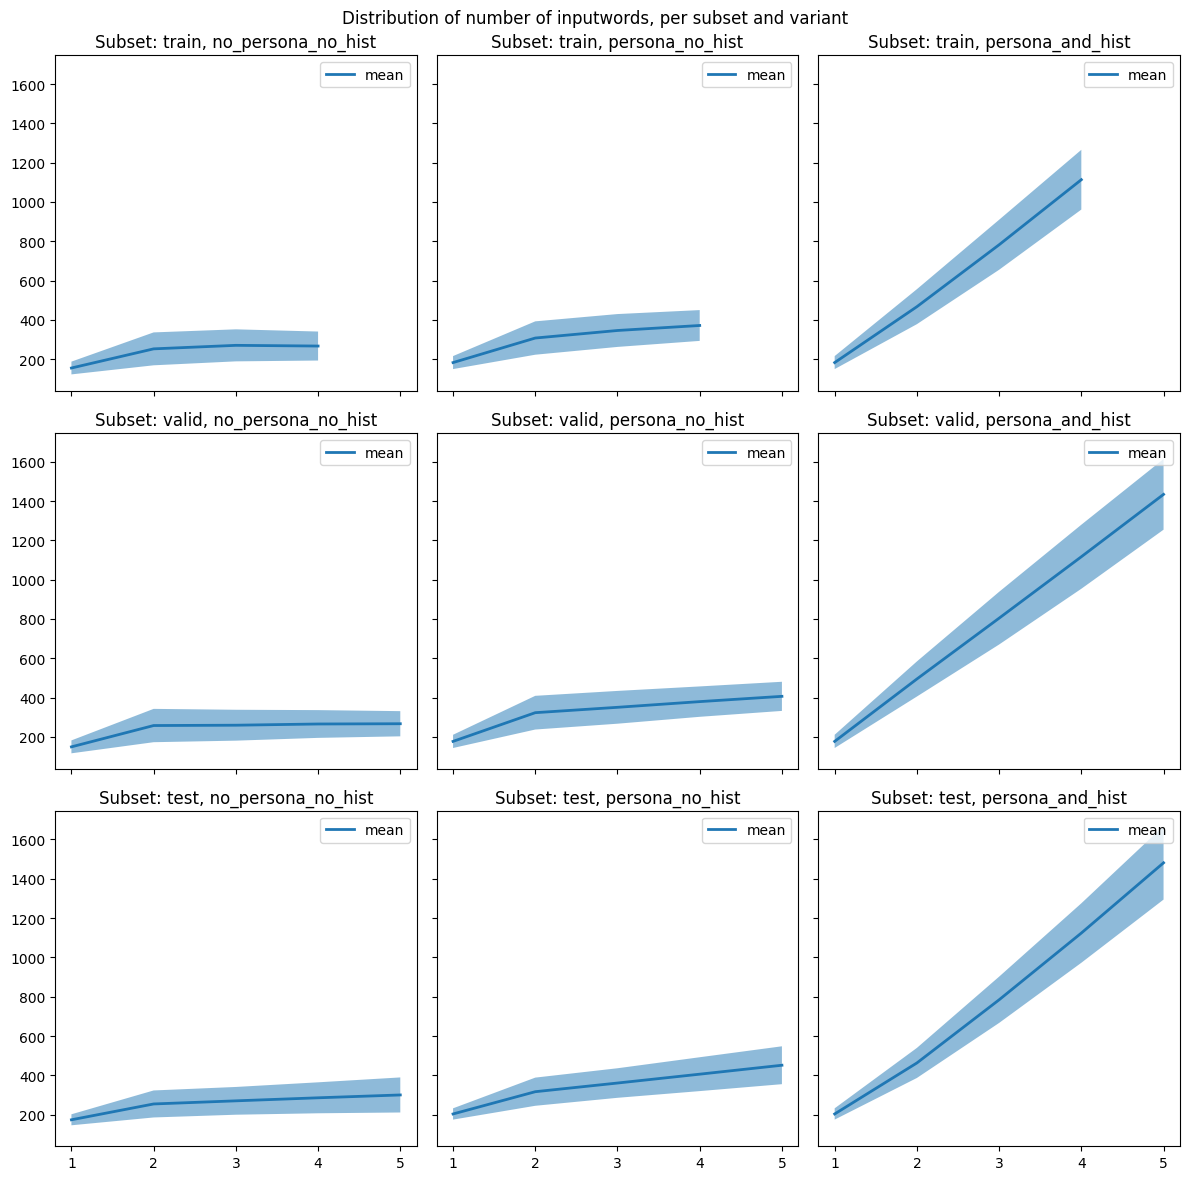

In [14]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(12, 12), sharey=True, sharex=True)

def plot_mean_with_std(ax, values, subset, title):
    sessions = [s for s in subsets.keys() if subset in subsets[s]]
    means = np.array([vals.mean() for vals in values])
    stds = np.array([vals.std() for vals in values])
    ax.plot(sessions, means, lw=2, label='mean')
    ax.fill_between(sessions, means+stds, means-stds, alpha=0.5)
    ax.legend()
    ax.set_title(title)
    return ax

for j, variant in enumerate(variants.keys()):
    for i, subset in enumerate(['train', 'valid', 'test']):
        m_input = []
        sessions = [s for s in subsets.keys() if subset in subsets[s]]
        for session in sessions:
            selection = selection = (df["session"] == session) & (df["variant"] == variant) & (df["subset"] == subset)
            m_input.append(df[selection]['inputwords'].values)
        bar_axes = plot_mean_with_std(ax[i][j], m_input, subset, title=f"Subset: {subset}, {variant}")

fig.suptitle(f"Distribution of number of inputwords, per subset and variant")
fig.tight_layout()

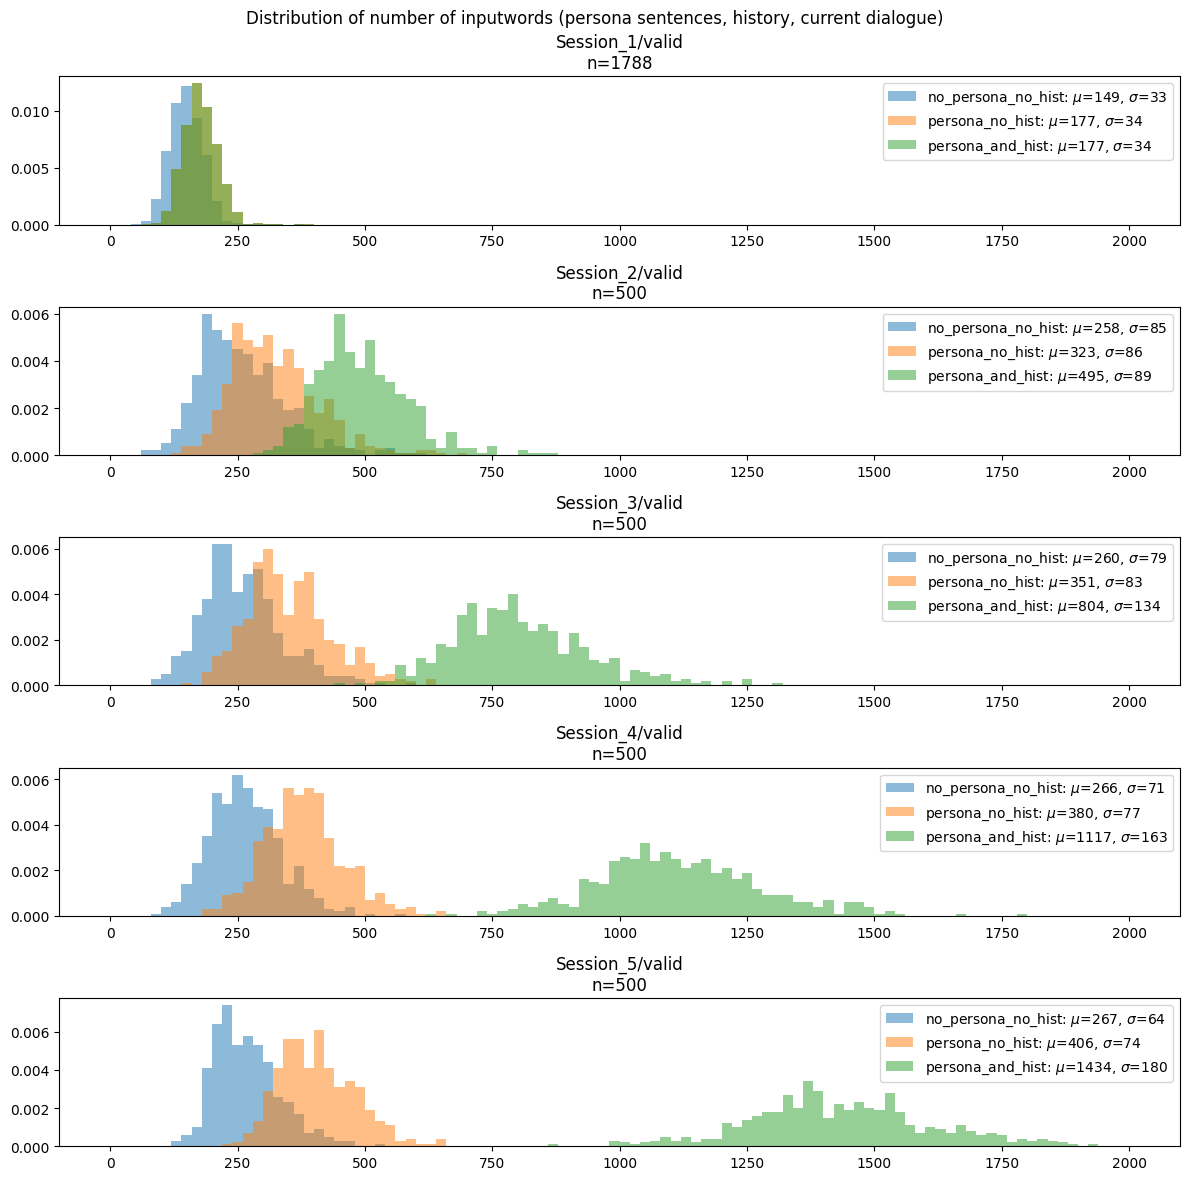

In [15]:
subset = 'valid'
sessions = [k for k in subsets.keys() if subset in subsets[k]]
fig, ax = plt.subplots(ncols=1, nrows=len(sessions), figsize=(12, 12))

def plot_hist_bar(ax, values, session, title, bins, range):

    for variant, vals in zip(variants.keys(), values): 
        label = f"{variant}: " + r"$\mu$" + f"={vals.mean():.0f}, " + r"$\sigma$" + f"={vals.std():.0f}"
        ax.hist(vals, bins=bins, range=range, alpha=0.5, label=label, density=True)
    ax.legend()
    ax.set_title(title)
    return ax

for i, session in enumerate(sessions):
    m_input = []
    for variant in variants.keys():
        selection = selection = (df["session"] == session) & (df["variant"] == variant) & (df["subset"] == subset)
        m_input.append(df[selection]['inputwords'].values)
    bar_axes = plot_hist_bar(ax[i], m_input, session, title=f"Session_{session}/{subset}\nn={len(m_input[0])}", bins=100, range=(0,2000))

fig.suptitle(f"Distribution of number of inputwords (persona sentences, history, current dialogue)")
fig.tight_layout()

### Test charts

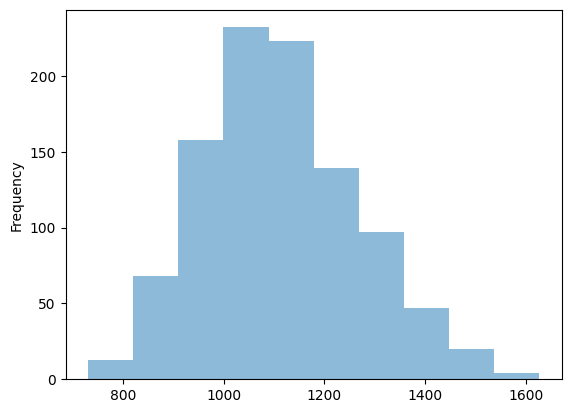

In [16]:
session=4
variant='persona_and_hist'
subset='train'

selection = (df["session"] == session) & (df["variant"] == variant)& (df["subset"] == subset)
ax = df[selection]["inputwords"].plot.hist(bins=10, alpha=0.5)

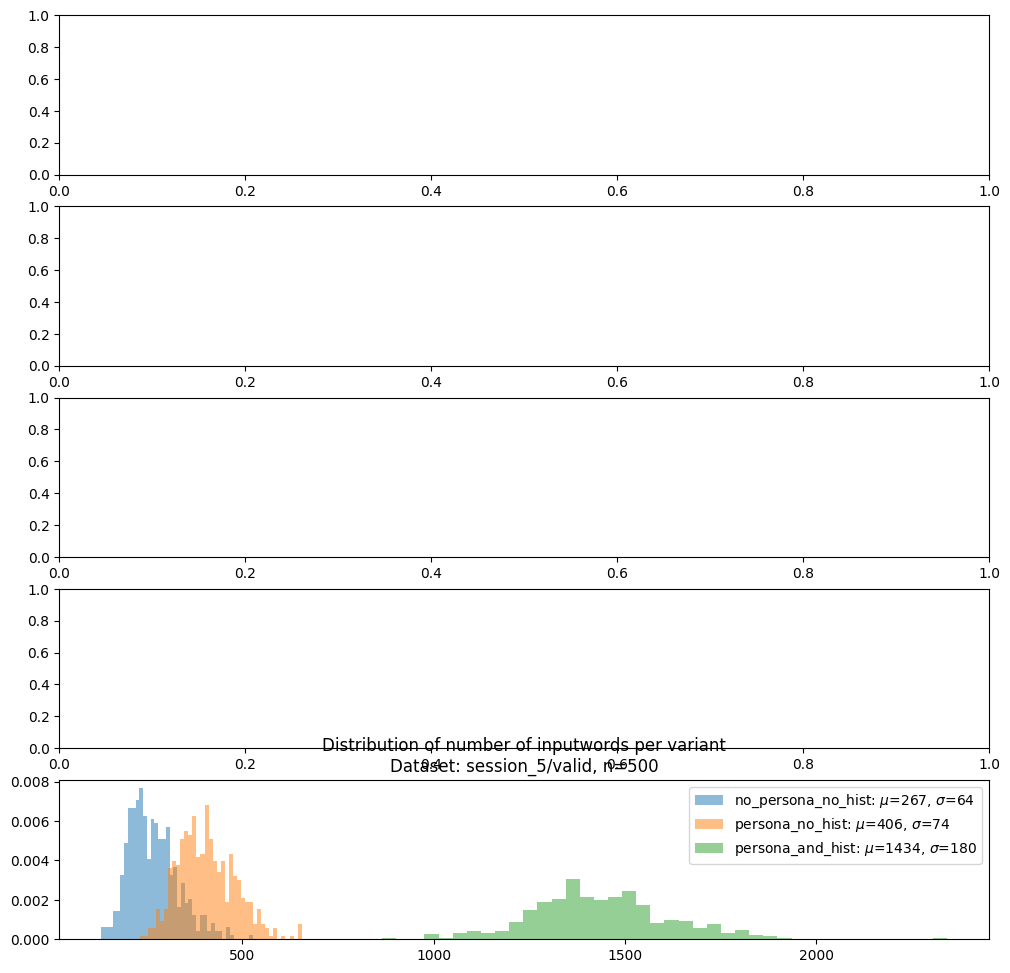

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=len(subsets.keys()), figsize=(12, 12))

session=5
subset='valid'

selection = (df["session"] == session) & (df["subset"] == subset)

labels = []
for variant in variants.keys():
    subset_df = df.loc[selection & (df["variant"] == variant), "inputwords"]
    labels.append(f"{variant}: "+ r"$\mu$" + f"={subset_df.mean():.0f}, " + r"$\sigma$" + f"={subset_df.std():.0f}")
    plt.hist(subset_df, alpha=0.5, label=variant, density=True, bins=40)
legend = plt.legend(labels=labels)
title = plt.title(f"Distribution of number of inputwords per variant\nDataset: session_{session}/{subset}, n={len(subset_df)}")

array([<Axes: title={'center': 'no_persona_no_hist'}>,
       <Axes: title={'center': 'persona_and_hist'}>,
       <Axes: title={'center': 'persona_no_hist'}>], dtype=object)

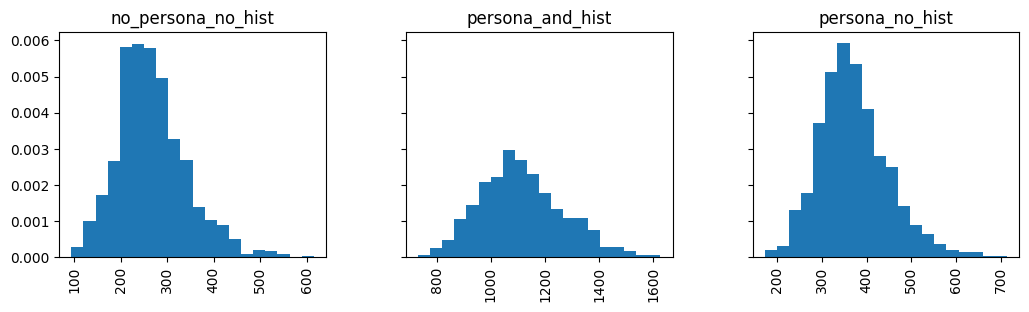

In [18]:
session=4
subset='train'

selection = (df["session"] == session) & (df["subset"] == subset)

df_hist = df[selection]
df_hist['inputwords'].hist(by=df_hist['variant'], bins=20, layout=(1,3), figsize=(12,3), density=True, sharey=True)

## Visualization with matplotlib

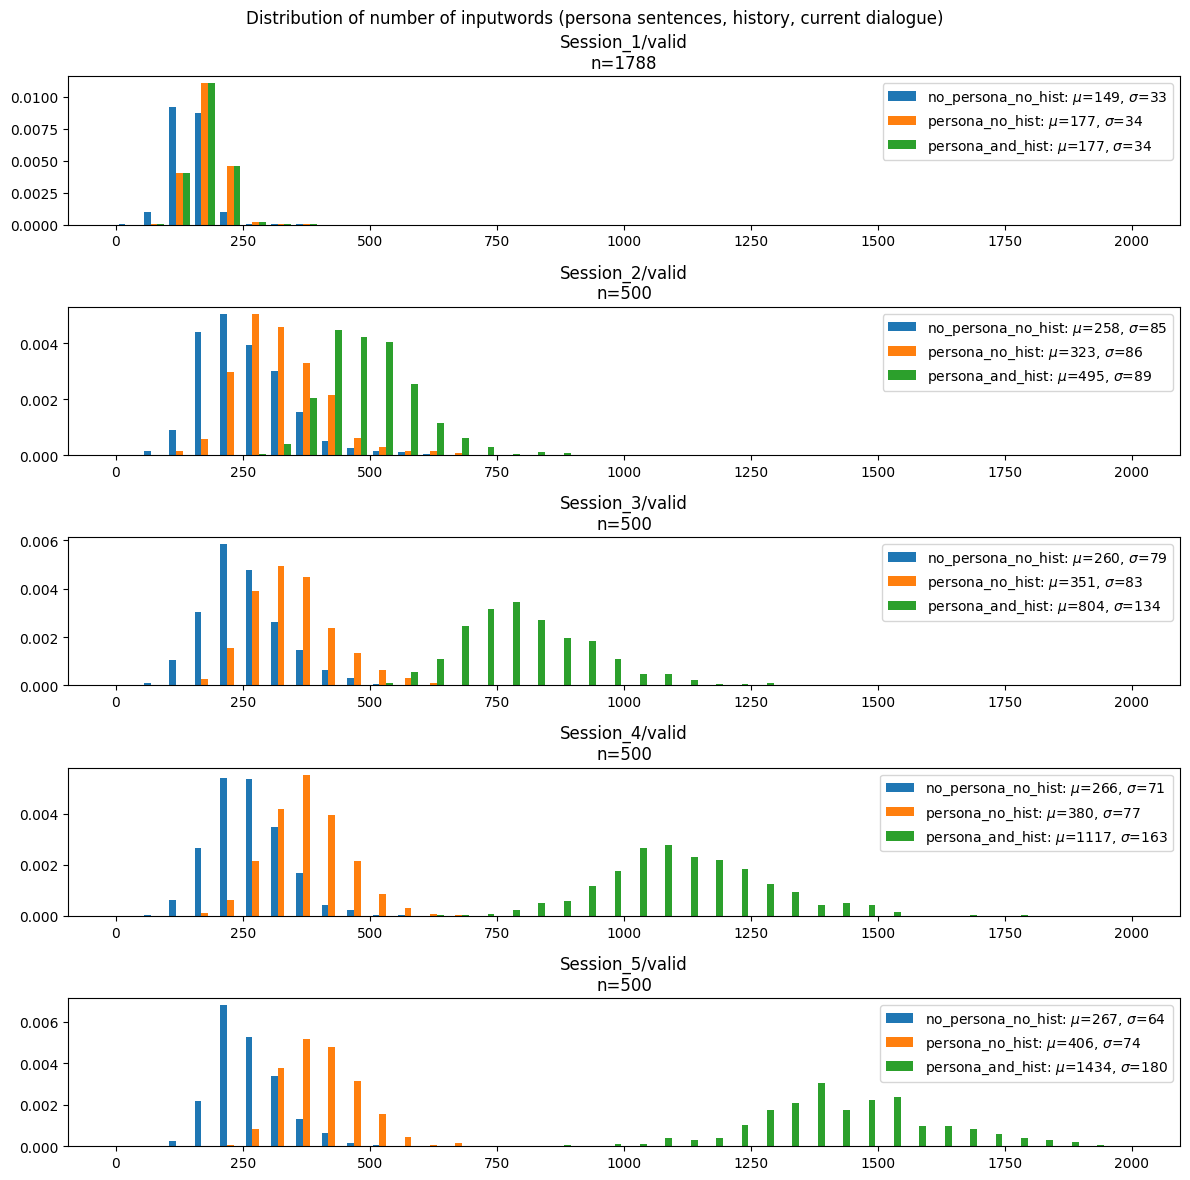

In [19]:
## Using matplottlib - horizontal

subset = 'valid'
sessions = [k for k in subsets.keys() if subset in subsets[k]]
fig, ax = plt.subplots(ncols=1, nrows=len(sessions), figsize=(12, 12))

def plot_hist_bar(ax, values, session, title, bins, range):
    labels = [f"{variant}: " + r"$\mu$" + f"={vals.mean():.0f}, " + r"$\sigma$" + f"={vals.std():.0f}" for variant, vals in zip(variants.keys(), values)]
    n, bins, patches = ax.hist(values, bins=bins, range=range, density=True, label=labels)
    legend = ax.legend()
    title = ax.set_title(title)
    return ax

for i, session in enumerate(sessions):
    m_input = []
    for variant in variants.keys():
        selection = selection = (df["session"] == session) & (df["variant"] == variant) & (df["subset"] == subset)
        m_input.append(df[selection]['inputwords'].values)
    bar_axes = plot_hist_bar(ax[i], m_input, session, title=f"Session_{session}/{subset}\nn={len(m_input[0])}", bins=40, range=(0,2000))

fig.suptitle(f"Distribution of number of inputwords (persona sentences, history, current dialogue)")
fig.tight_layout()

/Users/FrankVerhoef/opt/miniconda3/envs/pex/lib/python3.9/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


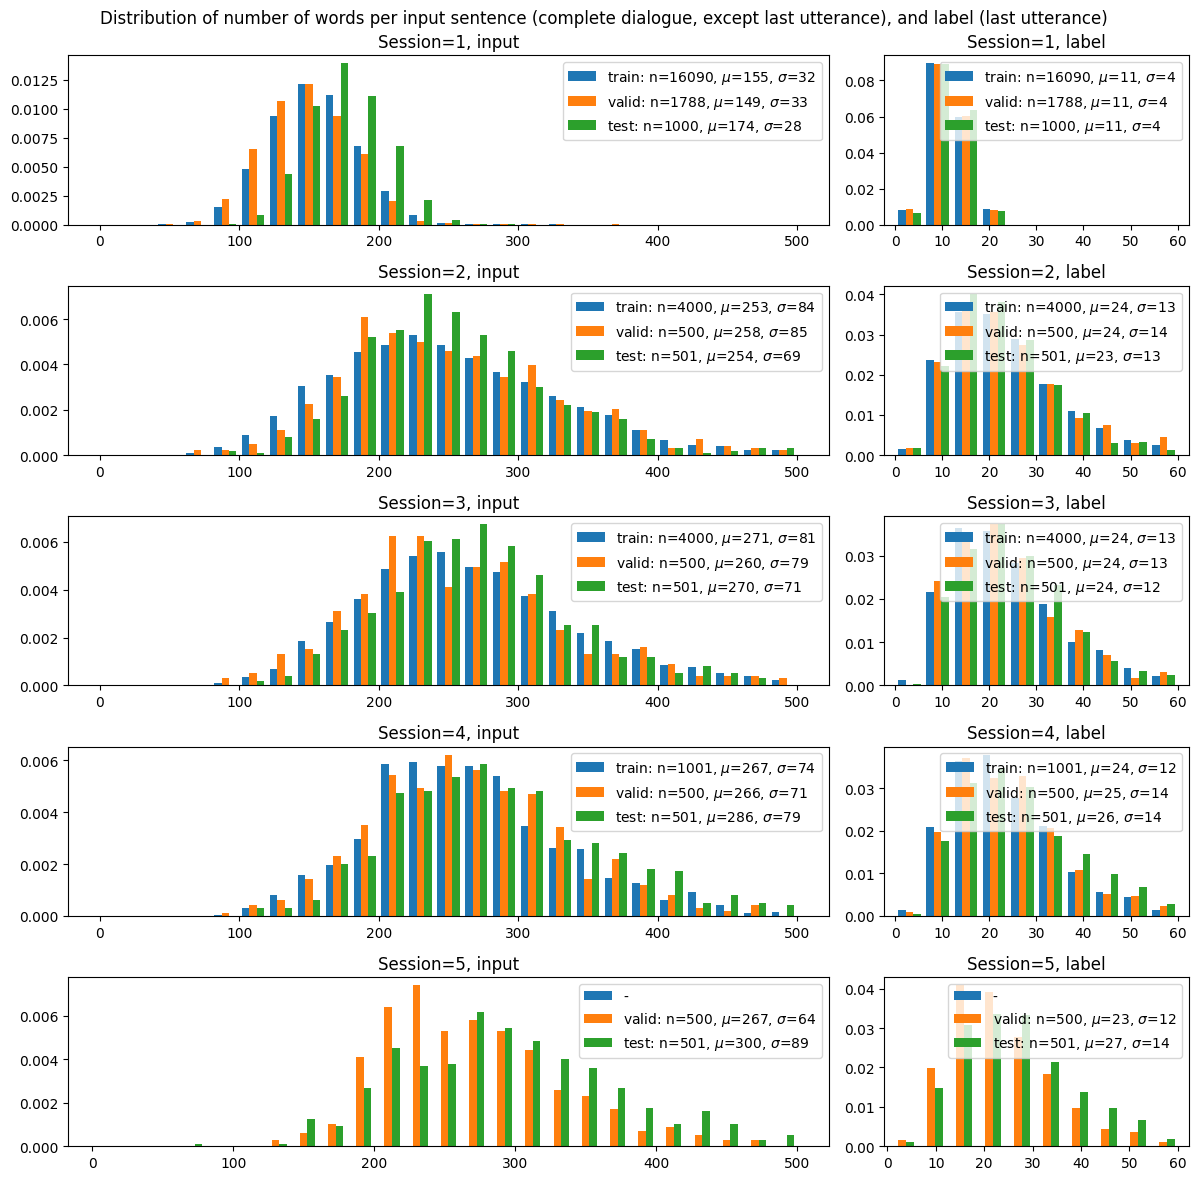

In [20]:
## Using matplottlib - horizontal

fig, ax = plt.subplots(ncols=2, nrows=len(subsets.keys()), figsize=(12, 12), gridspec_kw={'width_ratios': [10, 4]}, sharey=False)

def plot_hist_bar(ax, values, session, title, bins, range):
    labels = [f"{subset}: n={len(vals)}, " + r"$\mu$" + f"={vals.mean():.0f}, " + r"$\sigma$" + f"={vals.std():.0f}" for subset, vals in zip(subsets[session], values)]
    if session==5:
        labels = ['-'] + labels # add empty label
        values = [-1] + values # plot a bar, outside the range
    n, bins, patches = ax.hist(values, bins=bins, range=range, density=True, label=labels)
    legend = ax.legend()
    title = ax.set_title(title)
    return ax

for i, session in enumerate(subsets.keys()):
    m_input = [np.hstack([[val] * freq for val, freq in m[session]['no_persona_no_hist'][subset]['inputwords_per_sample']]) for subset in subsets[session]]
    m_label = [np.hstack([[val] * freq for val, freq in m[session]['no_persona_no_hist'][subset]['labelwords_per_sample'] if val != 0]) for subset in subsets[session]]
    bar_axes = plot_hist_bar(ax[i][0], m_input, session, title=f"Session={session}, input", bins=25, range=(0,500))
    bar_axes = plot_hist_bar(ax[i][1], m_label, session, title=f"Session={session}, label", bins=10, range=(0,60))

fig.suptitle("Distribution of number of words per input sentence (complete dialogue, except last utterance), and label (last utterance)")
fig.tight_layout()

### Other charts

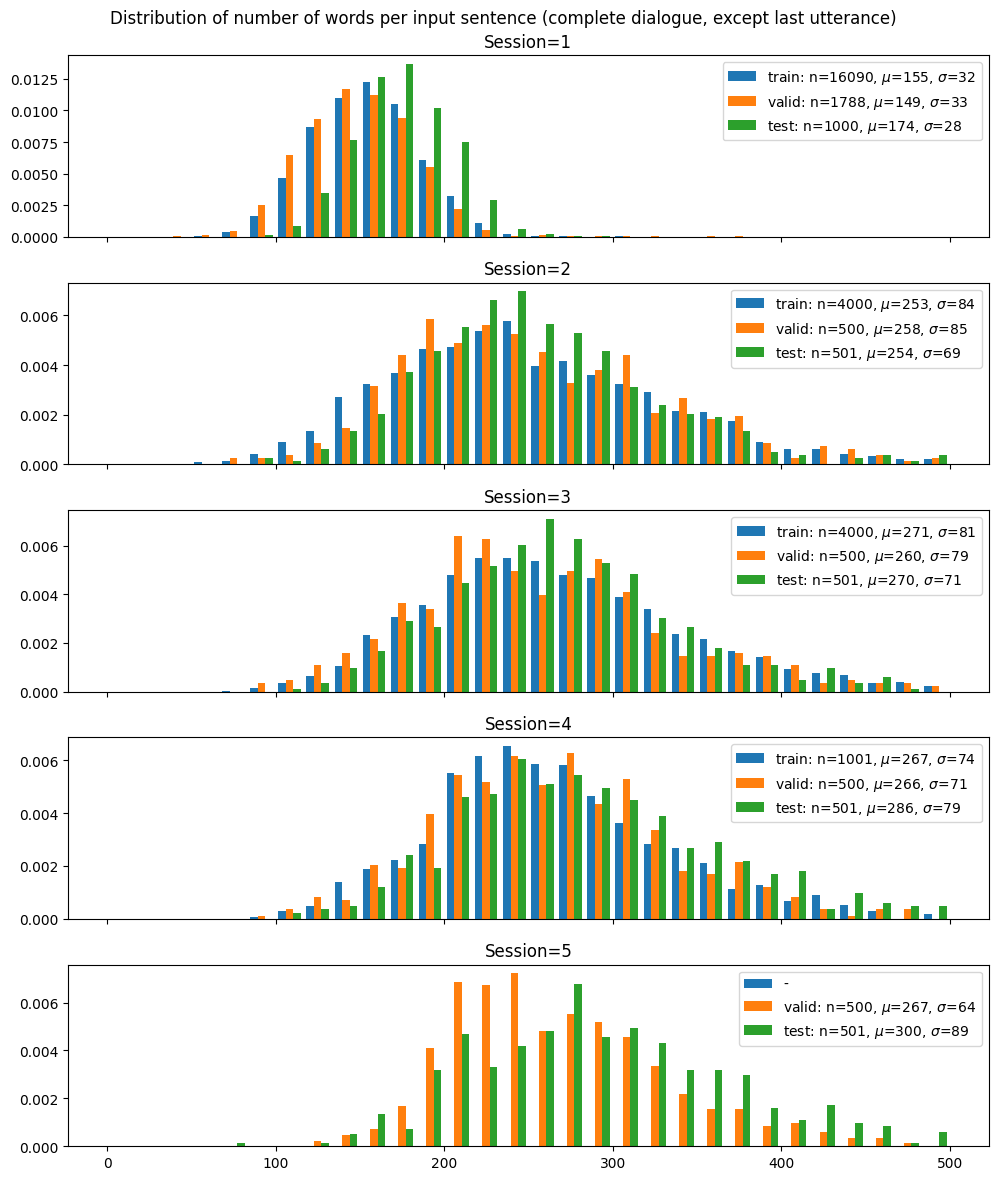

In [21]:
## Using matplottlib - horizontal

fig, ax = plt.subplots(ncols=1, nrows=len(subsets.keys()), figsize=(10, 12), sharex=True)

def plot_hist_bar(ax, values, session):
    labels = [f"{subset}: n={len(vals)}, " + r"$\mu$" + f"={vals.mean():.0f}, " + r"$\sigma$" + f"={vals.std():.0f}" for subset, vals in zip(subsets[session], values)]
    if session==5:
        labels = ['-'] + labels # add empty label
        values = [-1] + values # plot a bar, outside the range
    n, bins, patches = ax.hist(values, bins=30, range=(0,500), density=True, label=labels)
    legend = ax.legend()
    title = ax.set_title(f"Session={session}")
    return ax

for i, session in enumerate(subsets.keys()):
    values = [np.hstack([[val] * freq for val, freq in m[session]['no_persona_no_hist'][subset]['inputwords_per_sample']]) for subset in subsets[session]]
    bar_axes = plot_hist_bar(ax[i], values, session)

fig.suptitle("Distribution of number of words per input sentence (complete dialogue, except last utterance)")
fig.tight_layout()

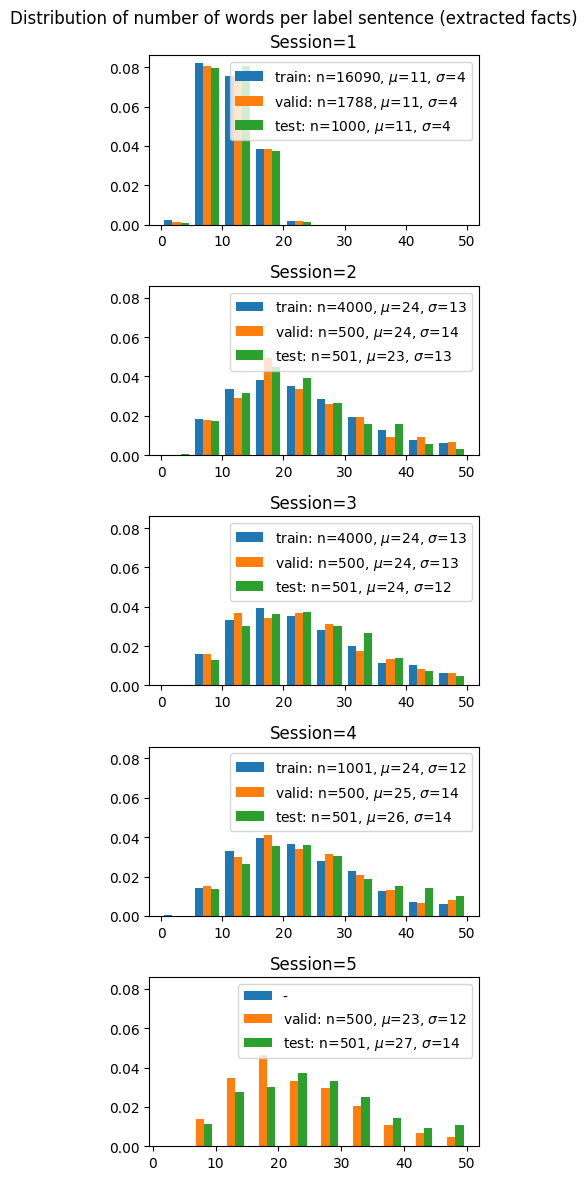

In [22]:
fig, ax = plt.subplots(ncols=1, nrows=len(subsets.keys()), figsize=(4,12), sharey=True)

def plot_hist_bar(ax, values, session):
    labels = [f"{subset}: n={len(vals)}, " + r"$\mu$" + f"={vals.mean():.0f}, " + r"$\sigma$" + f"={vals.std():.0f}" for subset, vals in zip(subsets[session], values)]
    if session==5:
        labels = ['-'] + labels # add empty label
        values = [-1] + values # plot a bar, outside the range
    n, bins, patches = ax.hist(values, bins=10, range=(0,50), density=True, label=labels)
    legend = ax.legend()
    title = ax.set_title(f"Session={session}")
    return ax

for i, session in enumerate(subsets.keys()):
    values = [
        np.hstack([
            [val] * freq 
            for val, freq in m[session]['no_persona_no_hist'][subset]['labelwords_per_sample']
            if val != 0 # plot only for sentences that contain a fact
        ]) 
        for subset in subsets[session]
    ]
    bar_axes = plot_hist_bar(ax[i], values, session)

fig.suptitle("Distribution of number of words per label sentence (extracted facts)")
fig.tight_layout()

## Test to draw dialogue

In [23]:
dialogue = msc_sessions[3]['persona_and_hist']['train'][10][0]
print(dialogue)

<self>I just bought a new mansion.
<self>I'm a rapper.
<self>I live in japan and own the biggest mansion in the country.
<self>I drive a ferrari.
<other>I prefer being outside.
<other>I listen to Britney Spears.
<other>I own a pink swimsuit, a pink towel, a pink beach ball. I am not a confident swimmer. I prefer swimming without currents.
<other>I own an outdoor music system.
<other>I work in a pharmacy.
<sessionbreak>dialogue start
<other>Hello, would you like to go swimming?
<self>Yes, very much. We can swim at my giant house.
<other>I hope your pool is outside and not inside since you have a giant house.
<self>I have both, my mansion is dope son.
<other>Great. I much prefer being outside. I will bring my favorite music.
<self>I hope it is rap, I'm the freshest mc in all the land.
<other>I listen to britney spears. All. Day. Long.
<self>I cannot hang with you then. I am straight up og.
<other>I'll bring my pink swimsuit, my pink towel, my pink beach ball...
<self>Now we are talking. 

In [11]:
# Select dataset
session = 4
subset = 'valid'
variant = 'persona_and_hist'

# Print and plot first dialogue
print("History:\n{}\nNext utterance:\n{}\n".format(*msc_sessions[session][variant][subset][0]))
msc_sessions[session][variant][subset].save_dialogue_fig(0)


History:
<self>I read twenty books a year.
<self>I'm a stunt double as my second job.
<self>I only eat kosher.
<self>I was raised in a single parent household.
<other>I like cooler weather.
<other>My son is in junior high.
<other>I used to work in human services. My wife goes to work. I stay at home.
<other>My dad worked at Home Depot.
<other>i want to see the new Stephen King adaptation. Shawshank Redemption was filmed where I live. I know people who were doubles in it. I love horror. True crime is my favorite reading subject. I would love The Butterfly Garden. I just read a serial killer book.
<other>I use kindle and Amazon Prime. I read Fatal Charm and want to read something similar.
<other>I love apps that sync with my library number.
<other>My life is boring.
<other>I read books to the kids group at the library.
<sessionbreak>dialogue start
<other>Hello what are doing today?
<self>I am good, I just got off work and tired, I have two jobs.
<other>I just got done watching a horror m

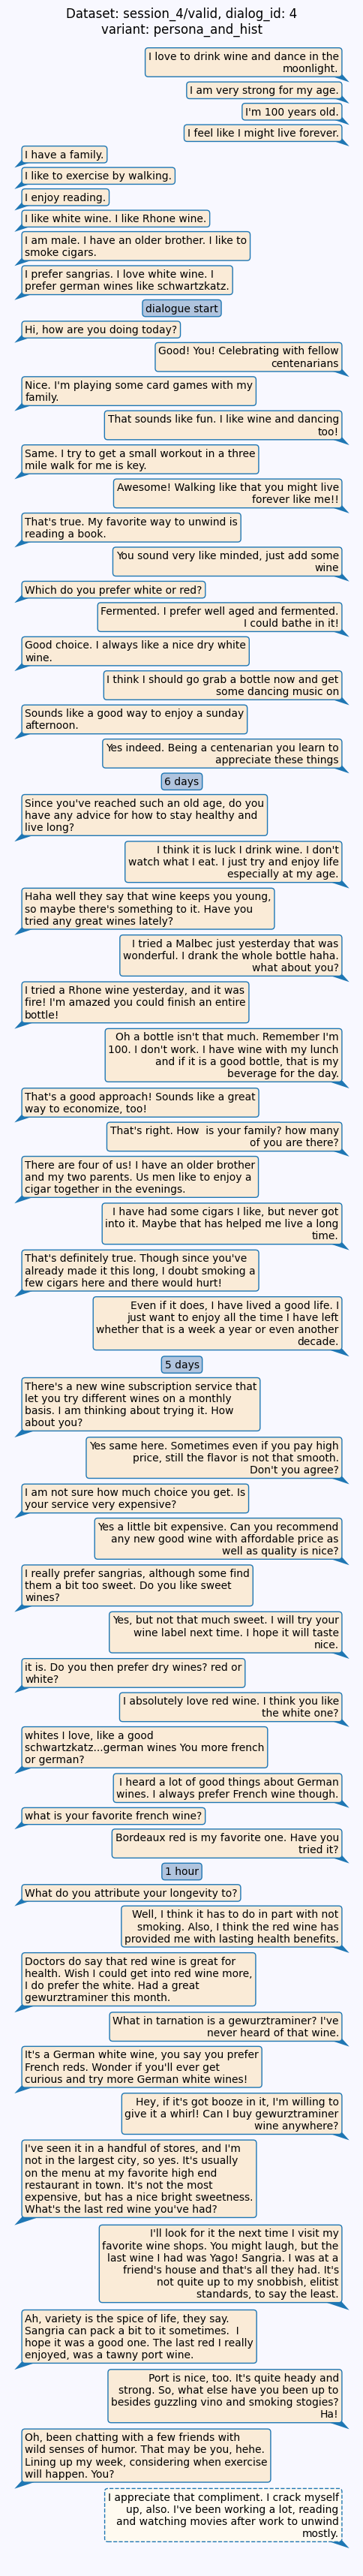

In [ ]:
import textwrap

prefixes = configs['default']['speaker_prefixes'] + [configs['default']['sessionbreak_token']]

PER_LINE = 0.22 # inch
PER_TURN = 0.15 # inch

def split_speaker_and_text(turn):
    for speaker in prefixes:
        prefix_len = len(speaker)
        if turn[:prefix_len] == speaker:
            return speaker, textwrap.wrap(turn[prefix_len:], width=45)
    assert False, f"None of the speaker prefixes {prefixes} found in turn: {turn}"


def plot_dialogue(turns, next_utterance, title):

    wrapped_turns = [split_speaker_and_text(t) for t in turns+ [prefixes[1] + next_utterance]]
    total_lines = sum([len(t[1]) for t in wrapped_turns])

    # Setup figure
    fig_height = 0.5 + len(wrapped_turns) * PER_TURN + total_lines * PER_LINE
    fig, ax = plt.subplots(figsize=(6, fig_height))
    fig.patch.set_facecolor('ghostwhite')

    # Determine triangle coordinates based on figure size
    triangle = np.array([[0.02, -0.05/fig_height], [0.05, -0.25/fig_height], [0.12, -0.25/fig_height]])

    ypos = 0.2 / fig_height 
    for i, (speaker, wrapped_turn) in enumerate(wrapped_turns):

        # Set alignment alternating left or right
        speaker_index = prefixes.index(speaker)
        alignment = {0: 'left', 1: 'right', 2: 'center'}[speaker_index]
        xpos = {0: 0.05, 1: 0.95, 2: 0.5}[speaker_index]
        bbox_style = dict(
            boxstyle="round", 
            fc={0: 'antiquewhite', 1: 'antiquewhite', 2: 'lightsteelblue'}[speaker_index], 
            ec='tab:blue'
        )
        if i == len(wrapped_turns) - 1:
            bbox_style['fc'] = 'floralwhite'
            bbox_style['linestyle'] = '--'

        # Plot the text
        text = ax.text(xpos, ypos, '\n'.join(wrapped_turn), 
            horizontalalignment=alignment,
            verticalalignment='top',
            wrap=True, 
            multialignment=alignment,
            bbox=bbox_style
        )

        # Increase ypos, for next utterance, depending on number of lines in current turn
        ypos += PER_TURN / fig_height + PER_LINE / fig_height * len(wrapped_turn)

        # Add speaker triangle, except for session breaks
        if speaker_index != 2:
            # Plot triangle below utterance, pointing left or right depending on alignment
            if alignment == 'left':
                triangle_patch = matplotlib.patches.Polygon(np.array([[0, ypos]]) + triangle)
            else:
                triangle_patch = matplotlib.patches.Polygon(np.array([[1, ypos]]) + triangle * np.array([[-1, 1]]))
            ax.add_patch(triangle_patch)

    # Final formatting
    ax.invert_yaxis()
    ax.set_title(title)
    plt.axis('off')
    return fig

# Select dialogue
session = 4
subset = 'valid'
variant = 'persona_and_hist'
dialog_index = 4
dialogue, next_utterance = msc_sessions[session][variant][subset][dialog_index]

# Make plot
dialog_id = msc_sessions[session][variant][subset].indices[dialog_index]
title=f"Dataset: session_{session}/{subset}, dialog_id: {dialog_id[0]}\nvariant: {variant}"
fig = plot_dialogue(dialogue.split('\n'), next_utterance, title)
# print(dialogue)